# ANN - Wine Dataset
---

In [2]:
# Import Library
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [3]:
# Load dataset
wine = datasets.load_wine()

X = wine.data
y = wine.target

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)
print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (136, 13)
X_val (24, 13)
X_test (18, 13)


In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)

In [6]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN:', acc_val)

Akurasi Validasi Training ANN: 0.3333333333333333


In [7]:
prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)

Akurasi Testing ANN: 0.1111111111111111


c:\Users\alifi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Akurasi Testing ANN: 0.1111111111111111


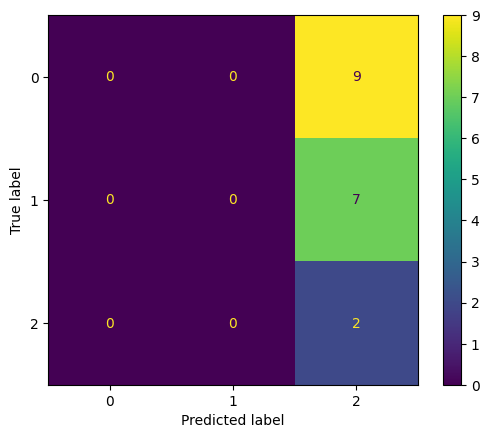

In [8]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

prediksi = mlp.predict(X_test)
plot_confusion_matrix(mlp, X_test, Y_test)
accuracy = accuracy_score(Y_test, prediksi)
print('Akurasi Testing ANN:', accuracy)

In [9]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train,3)
Y_val = to_categorical(Y_val,3)
Y_test = to_categorical(Y_test,3)

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [11]:
model.fit(X_train,Y_train,epochs=100,batch_size=10,validation_data=(X_val,Y_val))

Epoch 1/100
14/14 [==============================] - 4s 76ms/step - loss: 67.1448 - acc: 0.3676 - val_loss: 44.7466 - val_acc: 0.2500
Epoch 2/100
14/14 [==============================] - 0s 17ms/step - loss: 21.3831 - acc: 0.3824 - val_loss: 5.1084 - val_acc: 0.2917
Epoch 3/100
14/14 [==============================] - 0s 17ms/step - loss: 6.0763 - acc: 0.3971 - val_loss: 5.0649 - val_acc: 0.2917
Epoch 4/100
14/14 [==============================] - 0s 20ms/step - loss: 5.0698 - acc: 0.5074 - val_loss: 3.0961 - val_acc: 0.4583
Epoch 5/100
14/14 [==============================] - 0s 17ms/step - loss: 3.0223 - acc: 0.5221 - val_loss: 3.4702 - val_acc: 0.5000
Epoch 6/100
14/14 [==============================] - 0s 20ms/step - loss: 2.8211 - acc: 0.4779 - val_loss: 1.6417 - val_acc: 0.5833
Epoch 7/100
14/14 [==============================] - 0s 17ms/step - loss: 1.9217 - acc: 0.5515 - val_loss: 1.8491 - val_acc: 0.5000
Epoch 8/100
14/14 [==============================] - 0s 15ms/step - loss:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 13)                0         
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,091
Trainable params: 1,091
Non-trainable params: 0
_________________________________________________________________


In [13]:
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)

1/1 [==============================] - 0s 312ms/step - loss: 0.2393 - acc: 0.9444
Akurasi Testing ANN: 0.9444444179534912
